<a href="https://colab.research.google.com/github/Eslam-elnahas/My-Project-/blob/main/App_Code_Predection_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random


In [3]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [4]:
from keras import backend as K

In [5]:
from keras.models import load_model

In [6]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [7]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)




In [17]:
satellite_model = load_model('/content/satellite_segmentation_full.h5',
                          custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                           'Jaccard_coef': Jaccard_coef})

In [23]:
# satellite_model.get_config()


In [19]:
image = Image.open('/content/PH_1.png')
image = image.resize((256,256))
image = image.convert('RGB')
image = np.array(image)
image = np.expand_dims(image, 0)

In [20]:
prediction = satellite_model.predict(image)


1/1 [==============================] - 0s 272ms/step


In [21]:

predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

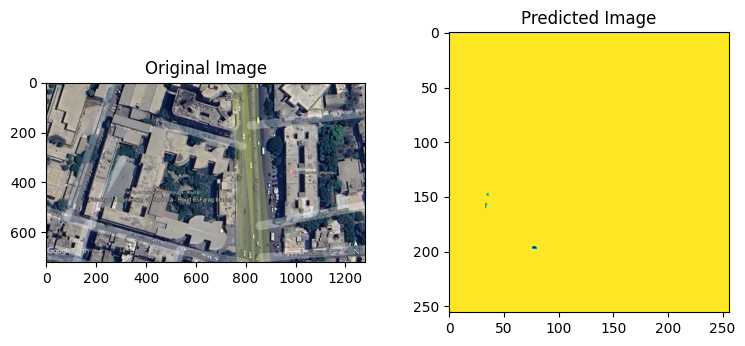

In [22]:

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('/content/PH_1.png'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)